Analysis:
1. There is a relationship between city type and number of drivers, as well as between number of rides and fares. The more rides there are, the lower the fare is.
2. Drivers dominate the urban areas, as 82% drive in those areas. Drivers in rural areas are lacking, as they make up only 1% of the total. 
3. Despite the lack of drivers, rural fares still make up 6% of the total, due to the higher fares.

In [56]:
#import dependencies
from matplotlib import pyplot as plt
from scipy import stats

import numpy as np
import pandas as pd
import os

In [57]:
#read csv
city_file = os.path.join('raw_data', 'city_data.csv')
ride_file = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
pyber_df = city_df.merge(ride_df, on = 'city')

pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# Bubble Plot

In [58]:
#group by city
city_df = pyber_df.groupby(['city'])

#find total number of rides per city
rides_per_city = city_df['city'].count()

#find type of city
average_per_city = city_df['fare'].mean()

#find average fare per city
type_of_city = city_df['type'].unique()

#find average fare per city
number_of_drivers = city_df['driver_count'].mean()

#create new df
ride_counts_df = pd.DataFrame({"Rides Per City":rides_per_city, "Average Fare": average_per_city, "Number of Drivers":number_of_drivers, "Type of City":type_of_city})

#create new dfs for city types
rural = ride_counts_df[ride_counts_df['Type of City'] == 'Rural']
suburban = ride_counts_df[ride_counts_df['Type of City'] == 'Suburban']
urban = ride_counts_df[ride_counts_df['Type of City'] == 'Urban']

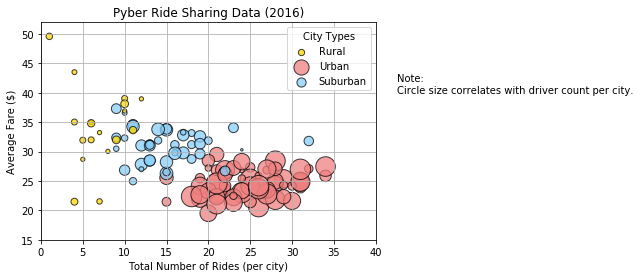

In [59]:
#add grid
plt.grid() 

#settings for urban
urban_plt = plt.scatter(urban['Rides Per City'], urban['Average Fare'], s = urban['Number of Drivers']*6, color = 'lightcoral', edgecolor = 'black',
            label = 'Urban', alpha = .75)
#settings for suburban
suburban_plt = ax = plt.scatter(suburban['Rides Per City'], suburban['Average Fare'], s = suburban['Number of Drivers']*6, color = 'lightskyblue', edgecolor = 'black',
           label = 'Urban', alpha = .75)
#settings for suburban
rural_plt = plt.scatter(rural['Rides Per City'], rural['Average Fare'], s = rural['Number of Drivers']*6, color = 'gold', edgecolor = 'black',
            label = 'Urban', alpha = .75, )

#change field size
plt.xlim(0, 40)
plt.ylim(15,52)

#add legend
plt.legend((rural_plt,urban_plt,suburban_plt),("Rural","Urban","Suburban"),title="City Types")

# Create a title, x label, and y label for plot
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

#add note
plt.annotate("Note: \nCircle size correlates with driver count per city.", xy=(30, 40), xycoords='data',xytext=(42.5, 40),)

#save figure
plt.savefig("pyberbubble.png")

plt.show()


In [60]:
#setup pie chart aesthetics 
labels = ["Rural", "Surburban", "Urban"]
colors = ["gold","lightskyblue", "lightcoral"]
explode=[0,0,.1]

# % of Total Fares by City Type

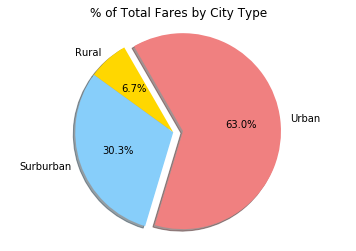

In [61]:
#group by city type and fare
total_fares = pyber_df.groupby(["type"])["fare"].sum()

plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct= '%1.1f%%', shadow=True, startangle=120)

#add title
plt.title('% of Total Fares by City Type')

plt.axis("equal")

#save figure
plt.savefig("totalfarespie.png")
plt.show()

# % of Total Rides by City Type

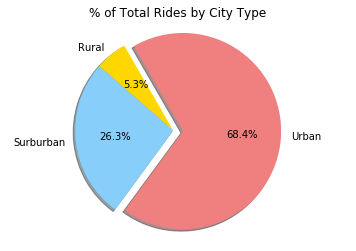

In [64]:
#group by city type and ride_id
total_rides = pyber_df.groupby(["type"])["ride_id"].count()

plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct= '%1.1f%%', shadow=True, startangle=120)

#add title
plt.title('% of Total Rides by City Type')

plt.axis("equal")

#save figure
plt.savefig("totalridespie.png")
plt.show()


# % of Total Drivers by City Type

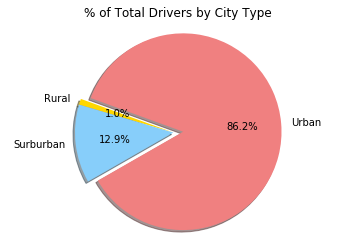

In [65]:
#group by city type and driver_count
total_drivers = pyber_df.groupby(["type"])["driver_count"].sum()

plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct= '%1.1f%%',shadow=True, startangle=160)

#add title
plt.title('% of Total Drivers by City Type')

plt.axis("equal")

#save figure
plt.savefig("totaldriverspie.png")
plt.show()